In [1]:
import nilmtk
from nilmtk.timeframe import TimeFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
TRAINING_DATA_DURATION = 12
delta_time = pd.to_timedelta(TRAINING_DATA_DURATION, unit='h')

# Building 1

In [4]:
redd = nilmtk.DataSet("redd.h5")

In [5]:
building_1 = redd.buildings[1].elec

In [6]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [7]:
building_1.available_ac_types('power')

['apparent', 'active']

In [8]:
building_1.submeters().available_ac_types('power')

['active']

In [9]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

In [10]:
# building_1.plot_when_on(on_power_threshold = 40)

### Main Meter

In [11]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [12]:
main_meter = building_1.mains()[1]

In [13]:
start_time = main_meter.get_timeframe().start
end_time = start_time + delta_time

In [14]:
print("Start Time:", start_time)
print("End Time:",   end_time)

Start Time: 2011-04-18 09:22:09-04:00
End Time: 2011-04-18 21:22:09-04:00


In [15]:
kw = {'sections': [TimeFrame(start=start_time, end=end_time)], 'sample_period': 3, 'resample': True}

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:09-04:00    225.283325
2011-04-18 09:22:12-04:00    222.349991
2011-04-18 09:22:15-04:00    222.853333
2011-04-18 09:22:18-04:00    222.706665
2011-04-18 09:22:21-04:00    222.646667
                                ...    
2011-04-18 21:21:54-04:00    139.929993
2011-04-18 21:21:57-04:00    139.446671
2011-04-18 21:22:00-04:00    140.023331
2011-04-18 21:22:03-04:00    140.406662
2011-04-18 21:22:06-04:00    142.940002
Freq: 3s, Name: (power, apparent), Length: 14400, dtype: float32
GOOD


<Axes: >

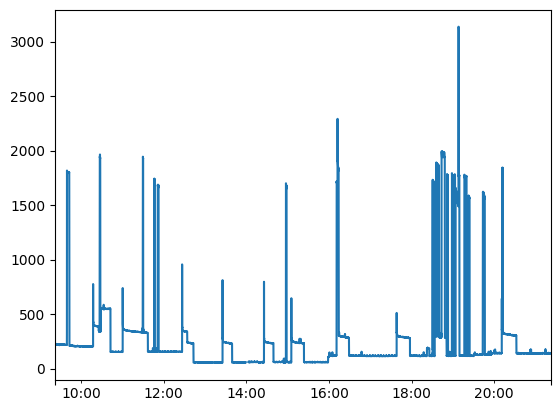

In [16]:
main_df = main_meter.power_series_all_data(**kw)
main_df.plot()

### Fridge

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    6.0
2011-04-18 09:22:15-04:00    6.0
2011-04-18 09:22:18-04:00    6.0
2011-04-18 09:22:21-04:00    6.0
2011-04-18 09:22:24-04:00    6.0
                            ... 
2011-04-18 21:21:54-04:00    7.0
2011-04-18 21:21:57-04:00    6.0
2011-04-18 21:22:00-04:00    6.0
2011-04-18 21:22:03-04:00    6.0
2011-04-18 21:22:06-04:00    6.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

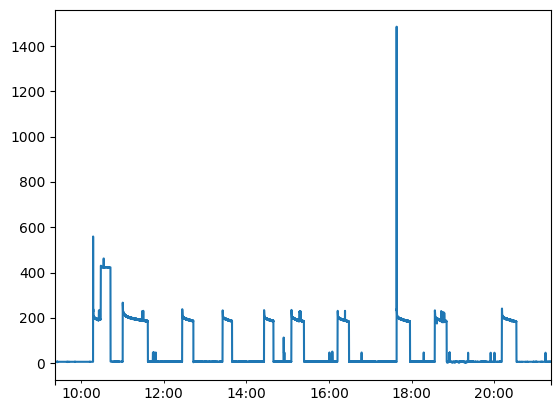

In [17]:
fridge = building_1['fridge']
fridge_df = fridge.power_series_all_data(**kw)
fridge_df.plot()

### Microwave

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    5.0
2011-04-18 09:22:15-04:00    5.0
2011-04-18 09:22:18-04:00    5.0
2011-04-18 09:22:21-04:00    5.0
2011-04-18 09:22:24-04:00    5.0
                            ... 
2011-04-18 21:21:54-04:00    4.0
2011-04-18 21:21:57-04:00    4.0
2011-04-18 21:22:00-04:00    4.0
2011-04-18 21:22:03-04:00    4.0
2011-04-18 21:22:06-04:00    4.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

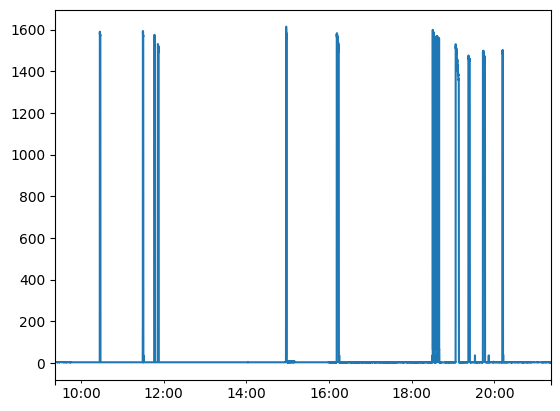

In [18]:
microwave = building_1['microwave']
microwave_df = microwave.power_series_all_data(**kw)
microwave_df.plot()

### Unknown

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    1.0
2011-04-18 09:22:15-04:00    1.0
2011-04-18 09:22:18-04:00    1.0
2011-04-18 09:22:21-04:00    1.0
2011-04-18 09:22:24-04:00    1.0
                            ... 
2011-04-18 21:21:54-04:00    1.0
2011-04-18 21:21:57-04:00    1.0
2011-04-18 21:22:00-04:00    1.0
2011-04-18 21:22:03-04:00    1.0
2011-04-18 21:22:06-04:00    1.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

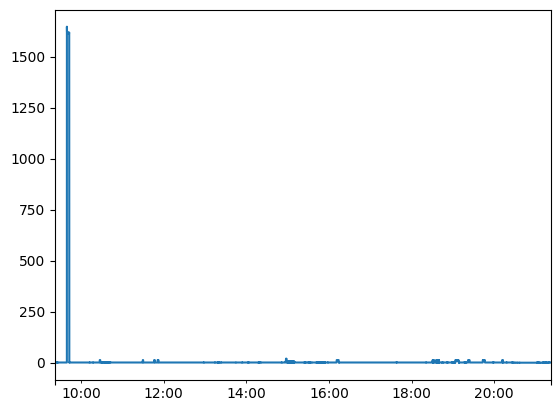

In [19]:
unknown = building_1['unknown']
unknown_df = unknown.power_series_all_data(**kw)
unknown_df.plot()

# Hart 85

In [20]:
# Hart85 functions
from nilmtk.disaggregate.hart_85 import Hart85

from nilmtk.feature_detectors.steady_states import find_steady_states
from nilmtk.feature_detectors.cluster import hart85_means_shift_cluster

## Step 1: Find steady states

In [21]:
# Initiate the Hart85 model
m_hart = Hart85({})

In [22]:
# Global variables
noise_level = 70
state_threshold = 15

In [23]:
main_df.name

('power', 'apparent')

In [24]:
columns = pd.MultiIndex.from_tuples([('power', 'apparent')])

In [25]:
m_hart.columns = columns
m_hart.steady_states, m_hart.transients = find_steady_states(main_df.to_frame().dropna(),  
                                                             noise_level = noise_level, 
                                                             state_threshold = state_threshold)  

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


Text(0.5, 0, 'Time')

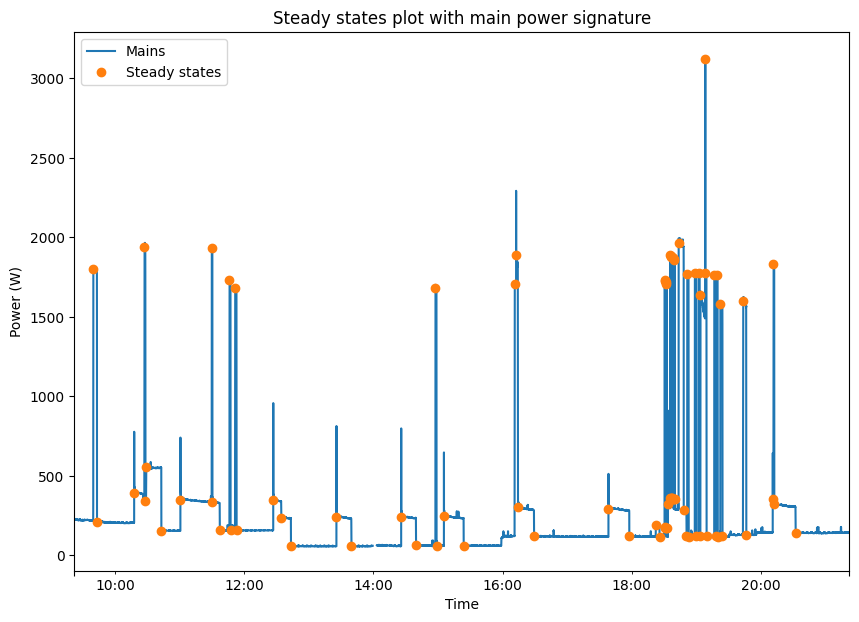

In [26]:
# Plot steady states with main
fig = plt.figure(figsize=(10, 7))
ax = main_df.plot()
m_hart.steady_states.plot(style='o', ax = ax);

plt.title("Steady states plot with main power signature")
plt.legend(["Mains", "Steady states"]);
plt.ylabel("Power (W)")
plt.xlabel("Time")

## Step 2: Find pairs (Rising Edge and Falling Edge)

In [27]:
# Parameters for pairing function
buffer_size = 20
min_tolerance = 100
percent_tolerance = 0.035
large_transition = 1000

In [28]:
m_hart.pair_df = m_hart.pair(buffer_size, min_tolerance, percent_tolerance, large_transition)

.........................Hart_85 Partial Fit End....................


In [29]:
m_hart.pair_df

,T1 Time,T1 Apparent,T2 Time,T2 Apparent
0,2011-04-18 09:39:39-04:00,1581.018725,2011-04-18 09:43:06-04:00,-1596.327068
1,2011-04-18 10:27:06-04:00,1599.624234,2011-04-18 10:28:03-04:00,-1597.762652
2,2011-04-18 11:29:42-04:00,1586.419717,2011-04-18 11:30:21-04:00,-1600.263039
3,2011-04-18 11:00:39-04:00,190.484191,2011-04-18 11:37:09-04:00,-175.345419
4,2011-04-18 11:46:12-04:00,1569.297023,2011-04-18 11:47:12-04:00,-1578.351164
5,2011-04-18 11:51:21-04:00,1526.207759,2011-04-18 11:52:45-04:00,-1519.146593
6,2011-04-18 12:26:54-04:00,188.912221,2011-04-18 12:34:15-04:00,-110.048511
7,2011-04-18 10:28:45-04:00,210.178375,2011-04-18 12:43:18-04:00,-178.663900
8,2011-04-18 13:25:36-04:00,182.138487,2011-04-18 13:39:24-04:00,-180.325649
9,2011-04-18 14:25:45-04:00,181.304185,2011-04-18 14:39:27-04:00,-178.490975


In [30]:
# Compute avg of paired transitions using the formula (as in pair_transitions function in pairing module)
pair_shape_df = pd.DataFrame(columns=['Height (W)','Duration (s)'])

pair_shape_df['Height (W)']= (m_hart.pair_df['T1 Apparent'].abs() + m_hart.pair_df['T2 Apparent'].abs()) / 2
pair_shape_df['Duration (s)']= pd.to_timedelta(m_hart.pair_df['T2 Time'] - m_hart.pair_df['T1 Time'],unit='s').dt.seconds

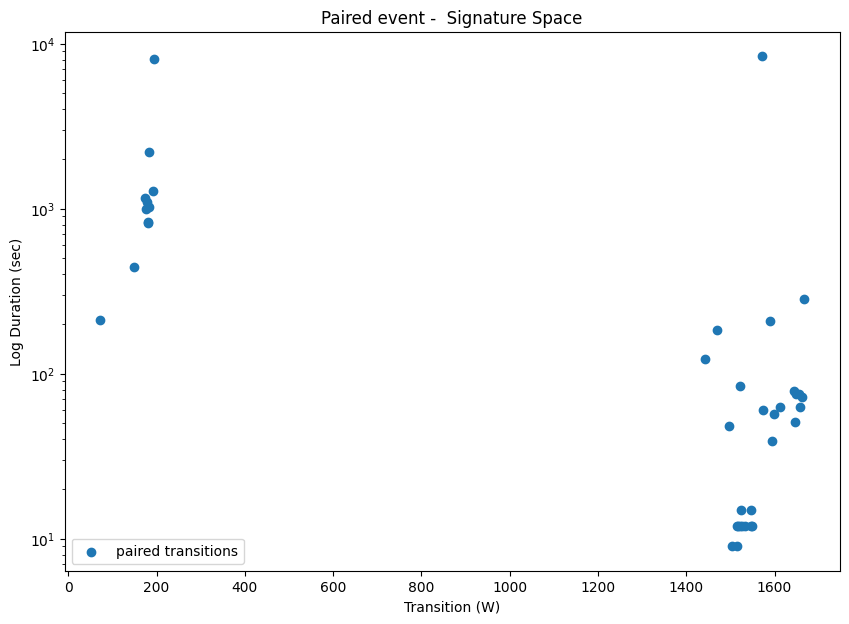

In [31]:
# Plot paired event space
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

# Time in log scale
ax.set_yscale('log')

# Plot paired transitions
ax.scatter(pair_shape_df['Height (W)'], pair_shape_df['Duration (s)'], label='paired transitions')

plt.title("Paired event -  Signature Space")
plt.legend()
plt.ylabel("Log Duration (sec)")
plt.xlabel("Transition (W)");

## Step 3: Find Clusters

In [32]:
m_hart.centroids = hart85_means_shift_cluster(m_hart.pair_df, m_hart.columns)

In [33]:
m_hart.centroids

,power
,apparent
0,1541.232376
1,1624.464612
2,178.999470
3,71.426524


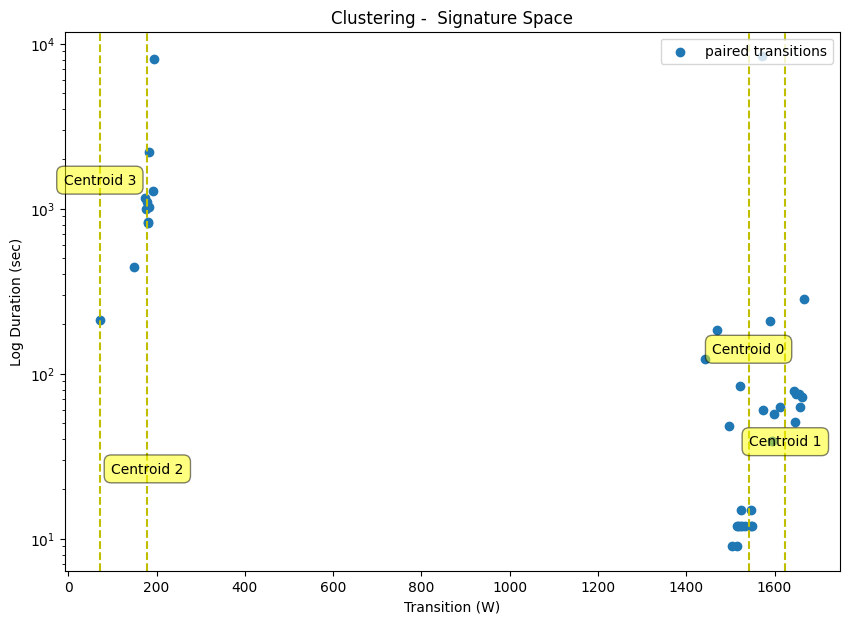

In [34]:
# Plot centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

# Time in log scale
ax.set_yscale('log')

# Plot paired transitions
ax.scatter(pair_shape_df['Height (W)'], pair_shape_df['Duration (s)'], label='paired transitions')

# Lines for centroids
for i, row in m_hart.centroids.iterrows():
    ax.axvline(m_hart.centroids.iloc[i, 0],color = 'y', linestyle='--')

plt.legend(loc=1)
plt.title("Clustering -  Signature Space")
plt.ylabel("Log Duration (sec)")
plt.xlabel("Transition (W)");

# Adding annotation for centroids
labels = ['Centroid {0}'.format(i) for i in range(len(m_hart.centroids))]
for label, x, y in zip(labels, m_hart.centroids[('power','apparent')], pair_shape_df['Duration (s)']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, -20),
        textcoords = 'offset points', ha = 'center', va = 'center',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))

## Step 4: Training

In [35]:
import time

In [36]:
start_time = time.time()

m_hart.partial_fit(
        [main_df.to_frame().dropna()],
        [('fridge', [fridge_df.to_frame().fillna(0)])],
        buffer_size = buffer_size,
        noise_level= noise_level,
        state_threshold = state_threshold,
        min_tolerance = min_tolerance,
        percent_tolerance = percent_tolerance,
        large_transition = large_transition)

print("\n---Runtime: %s seconds ---" % (time.time() - start_time))

...........................Hart_85 Partial Fit Running...............
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
.........................Hart_85 Partial Fit End....................
..............................Predicting Centroid Matching..........................
...................................End Centroid Matching............................

---Runtime: 0.32399415969848633 seconds ---


## Hart85: Save Model

In [37]:
m_hart.model

{'best_matches': {'fridge': 2},
 'columns': [('power', 'apparent')],
 'state_threshold': 15,
 'noise_level': 70,
 'steady_states':                            active average
 2011-04-18 09:39:39-04:00     1801.609258
 2011-04-18 09:43:06-04:00      205.282190
 2011-04-18 10:17:42-04:00      393.114310
 2011-04-18 10:27:06-04:00     1940.750381
 2011-04-18 10:28:03-04:00      341.419446
 ...                                   ...
 2011-04-18 19:46:15-04:00      128.898649
 2011-04-18 20:10:54-04:00      352.888666
 2011-04-18 20:11:30-04:00     1835.110765
 2011-04-18 20:12:18-04:00      324.237778
 2011-04-18 20:32:03-04:00      140.135762
 
 [84 rows x 1 columns],
 'transients':                            active transition
 2011-04-18 09:39:39-04:00        1581.018725
 2011-04-18 09:43:06-04:00       -1596.327068
 2011-04-18 10:17:42-04:00         187.832119
 2011-04-18 10:27:06-04:00        1599.624234
 2011-04-18 10:28:03-04:00       -1597.762652
 ...                                  

In [38]:
m_hart.export_model('m_hart85.pickle')

## Hart85: Import Model

In [39]:
m_hart_load = Hart85({})
m_hart_load.import_model('m_hart85.pickle')

## Hart85: Testing

In [40]:
fridge_df_predicted = m_hart_load.disaggregate_chunk([main_df.to_frame()])[0]

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


Text(0.5, 0, 'Timestamp')

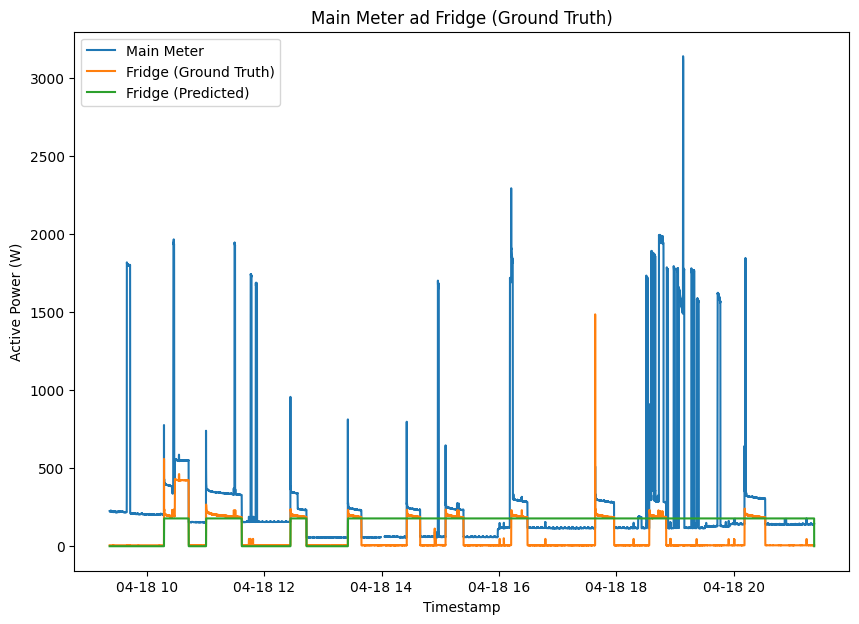

In [41]:
# Plot Vacuum
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(fridge_df, label = 'Fridge (Ground Truth)')
plt.plot(fridge_df_predicted, label = 'Fridge (Predicted)')

plt.title("Main Meter ad Fridge (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")